# EMP - Enriched Max-P regions problem


In [1]:
import regionalization.emp as emp
import weight.rook as rook
import libpysal 
import time
from libpysal.weights import Queen, Rook, KNN, Kernel, DistanceBand
import numpy as np
import geopandas
import pandas
import matplotlib.pyplot as plt
import jpype
from jpype import java
from jpype import javax

In [2]:
path = "C:/Users/50476/Documents/GitHub/Pineapple/Pineapple/JAVA/data/LACity/LACity.shp"
df = geopandas.read_file(path)


In [3]:
jpype.startJVM("-Xmx20480m", classpath = ["./Pineapple.jar"])

In [4]:
w = rook.from_dataframe(df)

In [5]:
inf = java.lang.Double.POSITIVE_INFINITY
p, regions = emp.emp(df, w, 'households', 'pop_16up', -inf, inf, 'pop_16up', -inf, inf, 'pop_16up', -inf, inf, 'pop_16up', 20000.0, inf, -inf, inf) 

In [10]:
p

124

In [7]:
regions

array([  1,   8,   1, ..., 933, 985, 933], dtype=int32)

In [12]:
unique, counts = np.unique(regions, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

(124, 2)


<AxesSubplot:>

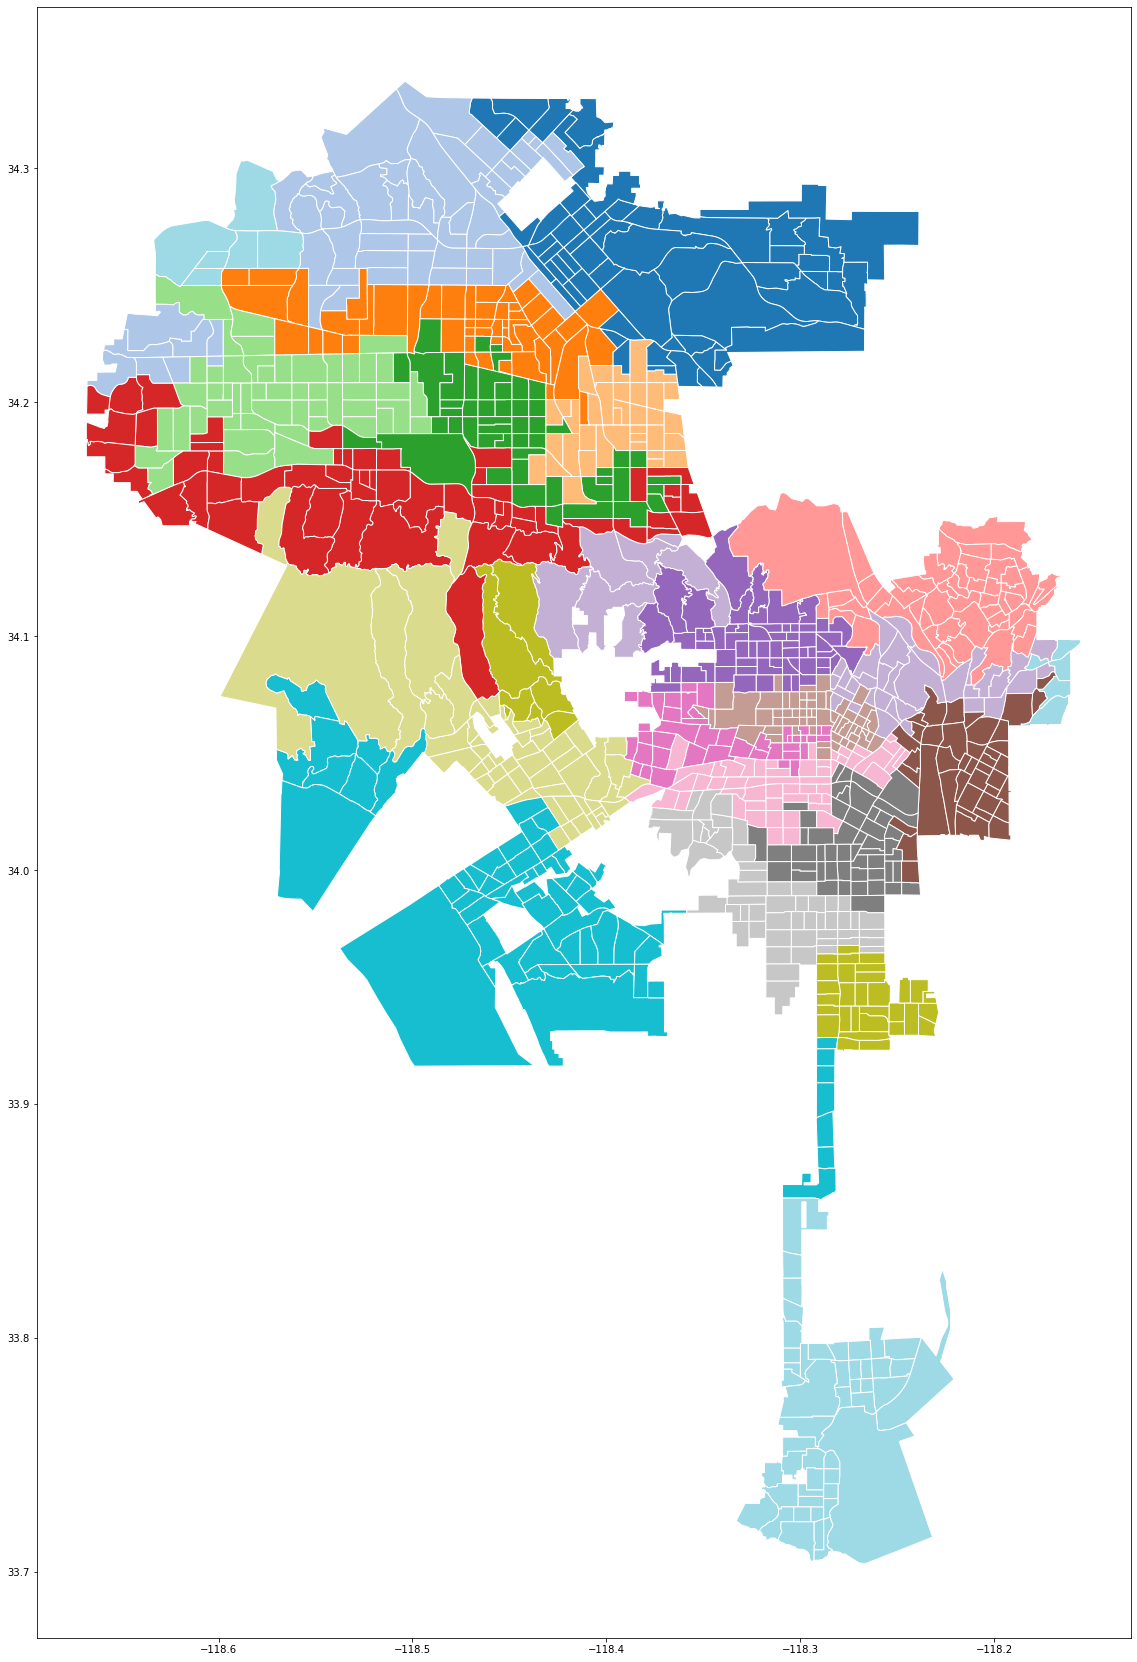

In [9]:
df["regionLabel"] = regions
df.plot(column = "regionLabel", cmap="tab20",  edgecolor="w", figsize = (20, 30))